In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

import numpy as np
from glob import glob


# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training'
valid_path = '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/validation'

# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training/*')

print(folders)
print(len(folders))

['/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training/500', '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training/Background', '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training/100', '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training/2000', '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training/200', '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training/20', '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training/50', '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training/10']
8


In [ ]:
Classifier=Sequential()

Classifier.add(Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Conv2D(32,(3,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))

Classifier.add(Flatten())

Classifier.add(Dense(units = 128, activation = 'relu'))
Classifier.add(Dense(units = 7, activation = 'softmax'))


Classifier.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   height_shift_range=0.2,
                                   featurewise_center=True,
                                   rotation_range=0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,)

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Projects/Currency Detection web app-ML/Indian currency dataset v1/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 3566 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = Classifier.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 3.7765 - accuracy: 0.1301

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


5/5 [==============================] - 57s 11s/step - loss: 3.7917 - accuracy: 0.1313 - val_loss: 1.9288 - val_accuracy: 0.1905
Epoch 2/50
5/5 [==============================] - 11s 2s/step - loss: 1.9023 - accuracy: 0.2027 - val_loss: 1.8853 - val_accuracy: 0.1429
Epoch 3/50
5/5 [==============================] - 11s 2s/step - loss: 1.8229 - accuracy: 0.2525 - val_loss: 1.7669 - val_accuracy: 0.2857
Epoch 4/50
5/5 [==============================] - 11s 2s/step - loss: 1.6718 - accuracy: 0.3809 - val_loss: 1.3924 - val_accuracy: 0.3095
Epoch 5/50
5/5 [==============================] - 11s 2s/step - loss: 1.3949 - accuracy: 0.3739 - val_loss: 1.2943 - val_accuracy: 0.4762
Epoch 6/50
5/5 [==============================] - 11s 2s/step - loss: 1.2257 - accuracy: 0.5511 - val_loss: 1.2506 - val_accuracy: 0.4048
Epoch 7/50
5/5 [==============================] - 11s 2s/step - loss: 1.0725 - accuracy: 0.5894 - val_loss: 1.2040 - val_accuracy: 0.4762
Epoch 8/50
5/5 [============================

In [ ]:
print(r.history)

{'loss': [3.8678839206695557, 1.885772466659546, 1.8123691082000732, 1.607871413230896, 1.4475904703140259, 1.1797082424163818, 0.989930272102356, 0.9329402446746826, 0.7995019555091858, 0.7467246651649475, 0.7941204309463501, 0.6721808910369873, 0.5957624912261963, 0.560806155204773, 0.41672125458717346, 0.36192601919174194, 0.34081631898880005, 0.3150574266910553, 0.27519065141677856, 0.2108863890171051, 0.18906880915164948, 0.23788975179195404, 0.21415944397449493, 0.2274172455072403, 0.23491595685482025, 0.19859854876995087, 0.12378738820552826, 0.17340101301670074, 0.15417927503585815, 0.08562009781599045, 0.08359422534704208, 0.07844945788383484, 0.07483746111392975, 0.11795061081647873, 0.05372616648674011, 0.04533151909708977, 0.07677464932203293, 0.05658705532550812, 0.04665545001626015, 0.06125675141811371, 0.07027868926525116, 0.05843862518668175, 0.055824123322963715, 0.18954187631607056, 0.11432261019945145, 0.07384450733661652, 0.16726376116275787, 0.1278482973575592, 0.0

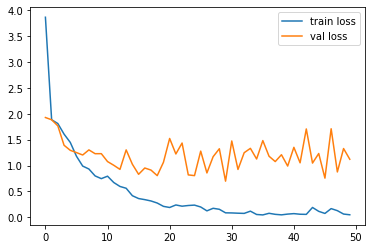

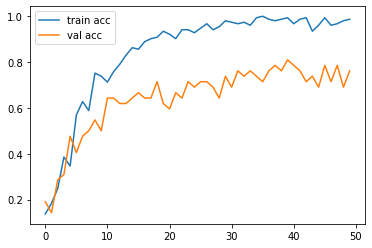

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = Classifier.predict(test_set)

print(y_pred)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


[[2.13111676e-02 7.18393471e-16 1.13257125e-12 2.05546136e-09
  9.78688836e-01 1.41883509e-08 2.09603854e-08]
 [9.75507796e-01 1.25622523e-06 2.13738829e-02 1.74237630e-05
  9.82588335e-06 3.07226717e-03 1.75359364e-05]
 [9.99999762e-01 7.92980895e-15 2.83920429e-07 2.36477837e-09
  1.43748224e-09 8.02636890e-09 3.58040021e-11]
 [1.19300880e-01 3.09275894e-09 8.80699098e-01 1.68690466e-08
  1.94616483e-08 2.06568318e-09 1.15378604e-08]
 [6.61601305e-01 4.65707744e-05 2.57609954e-05 3.38307261e-01
  1.79910385e-05 3.93848225e-08 1.15212777e-06]
 [3.58220394e-04 1.85667740e-18 6.56439303e-09 7.98285524e-14
  9.99641776e-01 2.48845389e-11 2.18809332e-10]
 [1.59494369e-03 2.52826838e-03 1.40890066e-07 1.01164263e-03
  3.21361562e-03 7.31870830e-01 2.59780616e-01]
 [6.09810406e-04 3.92826700e-12 9.99390125e-01 8.59155767e-15
  2.05658511e-11 1.30185127e-10 3.84812529e-11]
 [4.43344710e-12 1.29782213e-10 3.84286524e-15 3.21236046e-18
  2.14035712e-12 4.51458826e-09 1.00000000e+00]
 [9.561709

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

print(y_pred)

[4 0 0 2 0 4 5 2 6 0 1 2 4 1 6 3 5 0 1 0 0 2 1 0 5 5 0 5 4 6 2 0 1 1 1 5 4
 4 6 4 6 6]


In [ ]:
from tensorflow.keras.preprocessing import image


img=image.load_img('/content/drive/MyDrive/Colab Notebooks/currencydetection/dataset/Test/1Hundrednote/1.jpg',
                   target_size=(224,224))


test_image=image.img_to_array(img)
test_image=np.expand_dims(test_image, axis = 0)

result = Classifier.predict(test_image)
print(result)

a=np.argmax(result, axis=1)

print(a==5)

print(a==0)

[[1. 0. 0. 0. 0. 0. 0.]]
[False]
[ True]


In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

Classifier.save('/content/drive/MyDrive/Projects/Currency Detection web app-ML/model_classifier.h5')



In [ ]:
# load h5 file

'''

from tensorflow.keras.models import load_model

model=load_model('model_Classifier.h5')

'''